<a href="https://colab.research.google.com/github/whynotkush/SMAI/blob/main/CNN_cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2 style='color:blue' align='center'>CIFAR-10 Image Classification Using Convolutional Neural Network (CNN)</h2>

In this notebook, we will classify small images cifar10 dataset from tensorflow keras datasets. 

In [10]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from keras.optimizers import SGD
import numpy as np
import matplotlib.pyplot as plt

<h4 style="color:purple">Load the dataset</h4>

In [3]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

170500096/170498071 [==============================] - 4s 0us/step


(50000, 32, 32, 3)

In [4]:
y_train.shape

(50000, 1)

In [5]:
train_labels = tf.keras.utils.to_categorical(y_train)
test_labels = tf.keras.utils.to_categorical(y_test)

In [6]:
train_labels.shape

(50000, 10)

In [7]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

Let's plot some images to see what they are 

In [8]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index][0]])

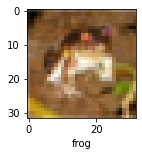

In [11]:
plot_sample(X_train, y_train, 0)

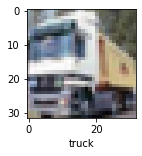

In [12]:
plot_sample(X_train, y_train, 1)

Normalize the images to a number from 0 to 1. Image has 3 channels (R,G,B) and each value in the channel can range from 0 to 255. Hence to normalize in 0-->1 range, we need to divide it by 255

<h4 style="color:purple">Normalizing the training data</h4>

In [13]:
X_train = X_train / 255.0
X_test = X_test / 255.0

<h4 style="color:purple">build a convolutional neural network to train our images</h4>

## No Batch Normalisation

In [ ]:
cnn0 = models.Sequential([
    
    #input layer
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    #hidden layer
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    #output layer
    layers.Flatten(),
    layers.Dense(10, activation='softmax')
])

In [ ]:
cnn0.compile(optimizer='SGD',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
cnn0.fit(X_train, train_labels, epochs=5,validation_data=(X_test, test_labels))

Epoch 1/5
1563/1563 [==============================] - 60s 38ms/step - loss: 2.1244 - accuracy: 0.2192 - val_loss: 1.7986 - val_accuracy: 0.3702
Epoch 2/5
1563/1563 [==============================] - 59s 38ms/step - loss: 1.7134 - accuracy: 0.4014 - val_loss: 1.5775 - val_accuracy: 0.4438
Epoch 3/5
1563/1563 [==============================] - 60s 38ms/step - loss: 1.5092 - accuracy: 0.4642 - val_loss: 1.4151 - val_accuracy: 0.4960
Epoch 4/5
1563/1563 [==============================] - 59s 38ms/step - loss: 1.3962 - accuracy: 0.5090 - val_loss: 1.3550 - val_accuracy: 0.5330
Epoch 5/5
1563/1563 [==============================] - 59s 38ms/step - loss: 1.3098 - accuracy: 0.5427 - val_loss: 1.3259 - val_accuracy: 0.5392


In [ ]:
cnn0.evaluate(X_test,test_labels)

313/313 [==============================] - 4s 12ms/step - loss: 1.3259 - accuracy: 0.5392


[1.3258980512619019, 0.5392000079154968]

## 2 Dense Layer

In [ ]:
cnn1 = models.Sequential([
    
    #input layer
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    #output layer
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [ ]:
cnn1.compile(optimizer='SGD',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
cnn1.fit(X_train, train_labels, epochs=5,validation_data=(X_test, test_labels))

Epoch 1/5
1563/1563 [==============================] - 36s 23ms/step - loss: 2.0365 - accuracy: 0.2667 - val_loss: 1.6908 - val_accuracy: 0.4166
Epoch 2/5
1563/1563 [==============================] - 31s 20ms/step - loss: 1.6496 - accuracy: 0.4306 - val_loss: 1.5043 - val_accuracy: 0.4660
Epoch 3/5
1563/1563 [==============================] - 32s 20ms/step - loss: 1.4759 - accuracy: 0.4849 - val_loss: 1.4423 - val_accuracy: 0.5000
Epoch 4/5
1563/1563 [==============================] - 32s 20ms/step - loss: 1.3820 - accuracy: 0.5204 - val_loss: 1.3709 - val_accuracy: 0.5079
Epoch 5/5
1563/1563 [==============================] - 31s 20ms/step - loss: 1.3084 - accuracy: 0.5442 - val_loss: 1.3198 - val_accuracy: 0.5364


In [ ]:
cnn1.evaluate(X_test,test_labels)

313/313 [==============================] - 2s 7ms/step - loss: 1.3198 - accuracy: 0.5364


[1.3198277950286865, 0.5364000201225281]

## 2 blocks of Conv2D -> BatchNorm2D->MaxPooling2D

In [15]:
cnn_2 = models.Sequential([
    
    #input layer
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    
    #hidden layer
    layers.Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    
    #output layer
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [16]:
cnn_2.compile(optimizer='SGD',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [17]:
history_2 = cnn_2.fit(X_train, train_labels, epochs=10,validation_data=(X_test, test_labels))

Epoch 1/10
1563/1563 [==============================] - 95s 61ms/step - loss: 1.6316 - accuracy: 0.4244 - val_loss: 1.6877 - val_accuracy: 0.4456
Epoch 2/10
1563/1563 [==============================] - 95s 61ms/step - loss: 1.1041 - accuracy: 0.6094 - val_loss: 1.1372 - val_accuracy: 0.6009
Epoch 3/10
1563/1563 [==============================] - 95s 61ms/step - loss: 0.9203 - accuracy: 0.6754 - val_loss: 1.2584 - val_accuracy: 0.5640
Epoch 4/10
1563/1563 [==============================] - 95s 61ms/step - loss: 0.8046 - accuracy: 0.7146 - val_loss: 1.6403 - val_accuracy: 0.5204
Epoch 5/10
1563/1563 [==============================] - 95s 61ms/step - loss: 0.7166 - accuracy: 0.7482 - val_loss: 1.0730 - val_accuracy: 0.6378
Epoch 6/10
1563/1563 [==============================] - 95s 61ms/step - loss: 0.6379 - accuracy: 0.7748 - val_loss: 1.1109 - val_accuracy: 0.6270
Epoch 7/10
1563/1563 [==============================] - 95s 61ms/step - loss: 0.5681 - accuracy: 0.8028 - val_loss: 1.6972 -

In [18]:
cnn_2.evaluate(X_test,test_labels)

313/313 [==============================] - 5s 16ms/step - loss: 1.0700 - accuracy: 0.6752


[1.0699645280838013, 0.6751999855041504]

In [20]:
y_pred2 = cnn_2.predict(X_test)

***Our y_pred2 is in one-hot form***

In [21]:
y_pred2.shape

(10000, 10)

***Reverse Transforming the y_pred2 from one-hot form to numeric values***


In [22]:
y_pred2 = np.argmax(y_pred2,axis=-1)

***Reshaping the y_pred from (10000,) to (10000,1)***

In [23]:
y_pred2=y_pred2.reshape(len(y_pred2),1)
y_pred2.shape

(10000, 1)

***Plotting predicted label for test image at index 3***

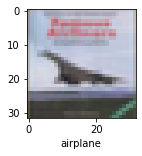

In [24]:
plot_sample(X_test, y_pred2,3)

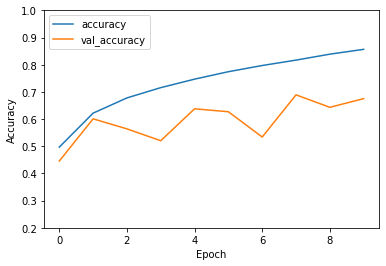

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history_2.history['accuracy'], label='accuracy')
plt.plot(history_2.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.2, 1])
plt.legend(loc='upper left')

 ## 3 blocks of Conv2D -> BatchNorm2D->MaxPooling2D

In [26]:
cnn_3 = models.Sequential([
    
    #input layer
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    
    #hidden layer
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    #hidden layer
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    
    #output layer
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [27]:
cnn_3.compile(optimizer='SGD',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [28]:
history_3 = cnn_3.fit(X_train, train_labels, epochs=10,validation_data=(X_test, test_labels))

Epoch 1/10
1563/1563 [==============================] - 112s 72ms/step - loss: 1.6414 - accuracy: 0.4199 - val_loss: 1.3399 - val_accuracy: 0.5363
Epoch 2/10
1563/1563 [==============================] - 112s 72ms/step - loss: 1.0805 - accuracy: 0.6144 - val_loss: 1.2874 - val_accuracy: 0.5406
Epoch 3/10
1563/1563 [==============================] - 113s 72ms/step - loss: 0.9176 - accuracy: 0.6782 - val_loss: 1.2201 - val_accuracy: 0.5908
Epoch 4/10
1563/1563 [==============================] - 113s 72ms/step - loss: 0.8081 - accuracy: 0.7169 - val_loss: 0.8970 - val_accuracy: 0.6892
Epoch 5/10
1563/1563 [==============================] - 113s 72ms/step - loss: 0.7398 - accuracy: 0.7433 - val_loss: 1.0096 - val_accuracy: 0.6603
Epoch 6/10
1563/1563 [==============================] - 113s 72ms/step - loss: 0.6758 - accuracy: 0.7621 - val_loss: 1.0524 - val_accuracy: 0.6411
Epoch 7/10
1563/1563 [==============================] - 112s 72ms/step - loss: 0.6205 - accuracy: 0.7836 - val_loss: 1

In [29]:
cnn_3.evaluate(X_test,test_labels)

313/313 [==============================] - 6s 18ms/step - loss: 0.9248 - accuracy: 0.7034


[0.9248499870300293, 0.7034000158309937]

In [30]:
y_pred = cnn_3.predict(X_test)

***Our y_pred2 is in one-hot form***

In [31]:
y_pred.shape

(10000, 10)

***Reverse Transforming the y_pred2 from one-hot form to numeric values***

In [32]:
y_pred = np.argmax(y_pred,axis=-1)

***Reshaping the y_pred from (10000,) to (10000,1)***

In [33]:
y_pred=y_pred.reshape(len(y_pred),1)
y_pred.shape

(10000, 1)

***Plotting predicted label for test image at index 3***

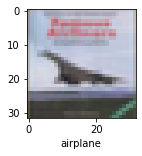

In [34]:
plot_sample(X_test, y_pred,3)

## Best Model

**From the Accuracies of above models on 5 epochs, Our last model with 3 blocks of conv2D gave the best result**

### plotting the accuracy vs epoch graph for our best model

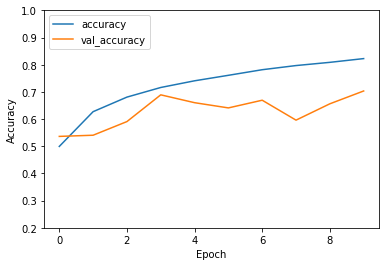

In [35]:
import matplotlib.pyplot as plt
plt.plot(history_3.history['accuracy'], label='accuracy')
plt.plot(history_3.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.2, 1])
plt.legend(loc='upper left')

### Model Summary

In [36]:
cnn_3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_4 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
batch_normalization_5 (Batch (None, 16, 16, 64)        256       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 8, 8, 64)         

#### Saving the best Model

In [37]:
cnn_3.save('/content/drive/MyDrive/SMAI/assgn3/q1')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/SMAI/assgn3/q1/assets
